In [0]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

from fbprophet import Prophet

In [0]:
df = pd.read_csv('Data\Bike_Sharing_Demand.csv',parse_dates = True)

In [30]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [0]:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [0]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})


In [33]:
validate = df[['ds','y']].tail(48)

df.drop(df[['ds','y']].tail(48).index,inplace=True)

train = df[['ds','y']]

train['y']= train['y']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:

m = Prophet()

In [40]:
m.fit(train)

p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
forecast = m.predict(future)

In [42]:
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)


MSE is : 9941.56207023959
MAE is : 65.59129402625572
RMSE is : 99.70738222538786
MAPE is : 107.83337535831912
R2 is : 0.6999158728241783



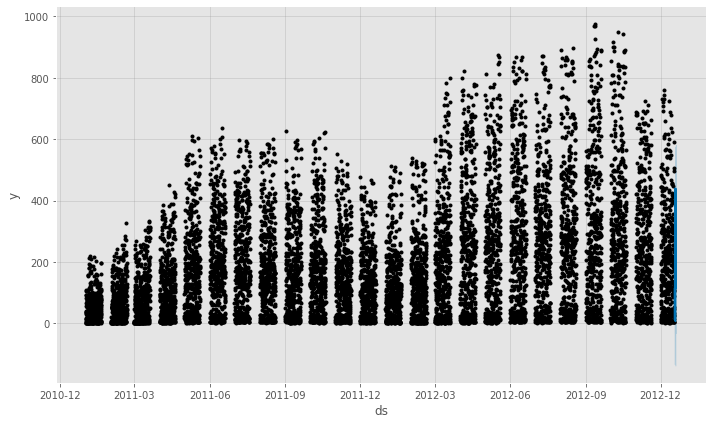

In [43]:
fig1 = m.plot(forecast)

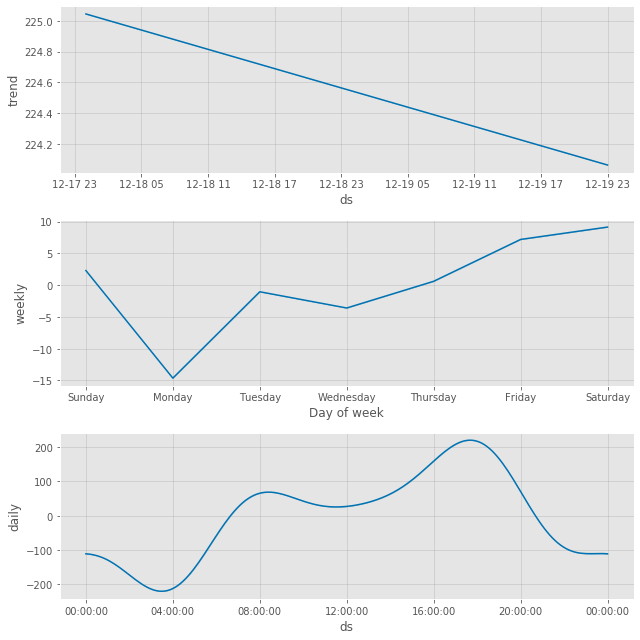

In [44]:
fig2 = m.plot_components(forecast)

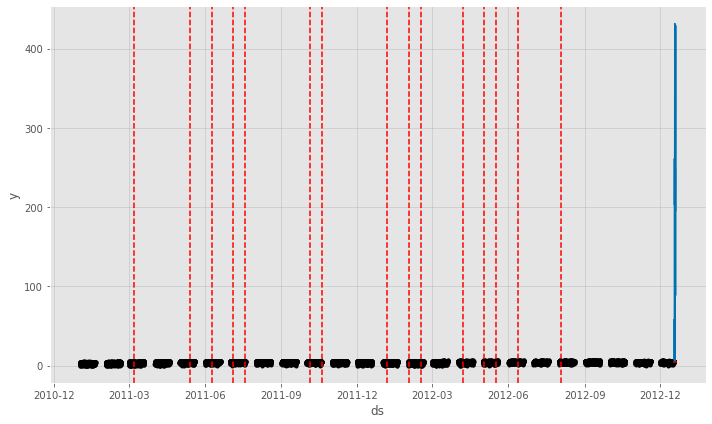

In [69]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)